# Transect 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cmocean.cm as cmo 
import gsw
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from Useful import *
from matplotlib.collections import PolyCollection
from scipy.spatial import Delaunay

from scipy.interpolate import griddata
from scipy.spatial import KDTree


from matplotlib.collections import LineCollection

## Data

In [28]:
pathB ='../../../../automated_testing/integrated_tests/idealised/Thule/Quad/50y/'
path ='../../../../automated_testing/integrated_tests/idealised/Thule/Lad/50y/'
ds_transHalbA = xr.open_dataset(path + 'transect_HalbraneA.nc')
ds_transHalbAq = xr.open_dataset(pathB + 'transect_HalbraneA.nc')
Lad = xr.open_dataset(path + 'main_output_ANT_00001.nc')

In [3]:
path50quad ='../../../automated_testing/integrated_tests/idealised/Thule/Fav_COLD_NC/'
transect = 'HalbraneA'

ds_transHalbA = xr.open_dataset(path50quad + 'transect_' + transect +'.nc')
ds_transHalbAq = ds_transHalbA

In [4]:
colorbar_kwargs = {
    'aspect': 7,      
    'pad': 0.02,      
}

In [5]:
Hb_HalbA = ds_transHalbA['Hb']
Hib_HalbA = ds_transHalbA['Hib']
Hs_HalbA = ds_transHalbA['Hs']
Hi_HalbA = ds_transHalbA['Hi']

Hbq_HalbA = ds_transHalbAq['Hb']
Hibq_HalbA = ds_transHalbAq['Hib']
Hsq_HalbA = ds_transHalbAq['Hs']
Hiq_HalbA = ds_transHalbAq['Hi']


In [6]:
Va = Lad['V'].values
V = Va.T

tri3 = Delaunay(V) 

x_flat = V[:,0]
y_flat = V[:, 1]

NameError: name 'Lad' is not defined

In [7]:
H_lad = Lad['H_lad']
S_lad = Lad['S_lad']
T_lad = Lad['T_lad']

NameError: name 'Lad' is not defined

In [9]:
u = 10

In [10]:
So = Lad['S_ocean']
To = Lad['T_ocean']

k = 8
depth = To['depth'][0:k]

In [8]:
tfs = 20 
afs = 18 
tifs = 15 
cbfs = 18
ctfs = 15


## Options Laddie transects

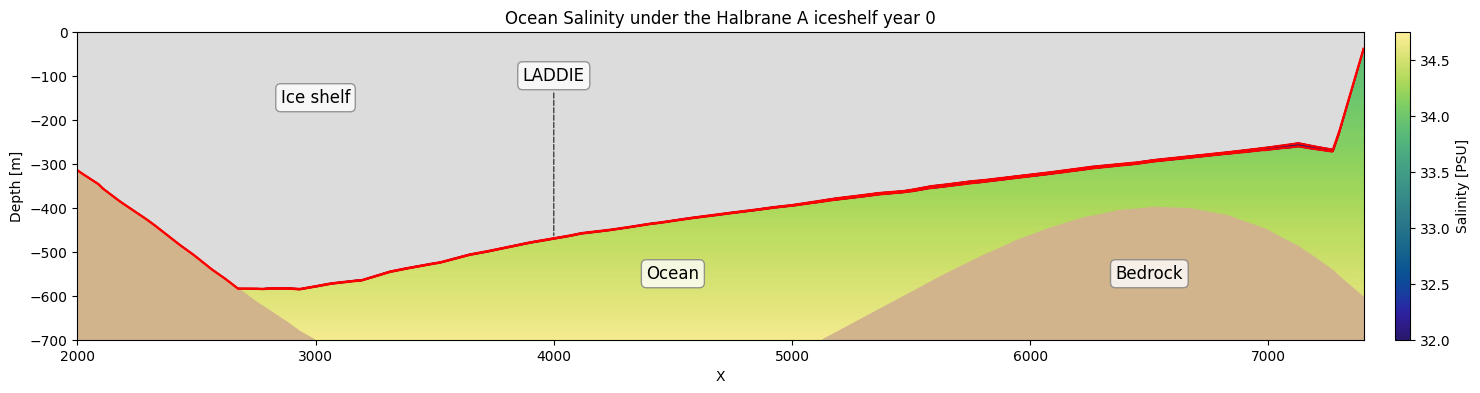

In [61]:
u = 0
vmin = 32
vmax = 34.75
cmap = cmo.haline
norm = plt.Normalize(vmin=vmin, vmax=vmax)

n = len(x) - 1

xi = np.column_stack([
    x[:-1],    # x[i]
    x[1:],     # x[i+1]
    x[1:],     # x[i+1]
    x[:-1]     # x[i]
])

H_lad_ = H_lad[u].values
S_lad_ = S_lad[u].values
T_lad_ = T_lad[u].values


H_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[0] for i in range(num)]
S_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[1] for i in range(num)]

yi = np.column_stack([
    Hib[u, :-1],                        # Hib_t[u][i]
    Hib[u, 1:],                         # Hib_t[u][i+1]
    Hib[u, 1:] - H_trans[1:],           # Hib_t[u][i+1] - H_trans[i+1]
    Hib[u, :-1] - H_trans[:-1]          # Hib_t[u][i] - H_trans[i]
])

colors = cmap(norm(S_trans[:-1]))



fig, ax = plt.subplots(figsize=(20, 4))

contour_ocean = ax.contourf(X, -Y, average_So, cmap=cmap, levels=100, vmin = vmin, vmax = vmax)                                               # Ocean gradient  
ax.plot(Hib[u], color='red')                                                                                                                # Base of Ice shelf
ax.plot(Hib[u] - H_trans ,color ='red')                                                                                                     # Base of LADDIE
ax.fill_between(x, np.zeros(len(Hib[u])), Hib[u], color='gainsboro', alpha=1)  
ax.fill_between(x, -700*np.ones(len(Hib[0])), Hb[u].where(makeearth), color='tan', alpha=1)                                                         # Ice shelf in white

polygons = [plt.Polygon(np.column_stack([xi[i], yi[i]]), closed=True, color=colors[i], alpha=0.6) for i in range(n)]                          # LADDIE gradient

for poly in polygons:
    ax.add_patch(poly)


# Legends, Colorbar and Titles 

ax.text( x=3000, y=-150, s="Ice shelf",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=4500, y=-550, s="Ocean",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=6500, y=-550, s="Bedrock",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))

laddie_x = 4000  
idx = np.abs(x - laddie_x).argmin()
laddie_y_bottom = Hib[u][idx] 
ax.annotate(
    "LADDIE",
    xy=(laddie_x, laddie_y_bottom),  # End of the line (on boundary)
    xytext=(laddie_x, -100),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)                                                                                            
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Salinity [PSU]', pad=0.02)

ax.set_xlim(2000,7400)
ax.set_xlabel('X')                                                                                                                  
ax.set_ylabel('Depth [m]')
ax.set_title(f'Ocean Salinity under the Halbrane A iceshelf year {u}')                                                                   

plt.show()


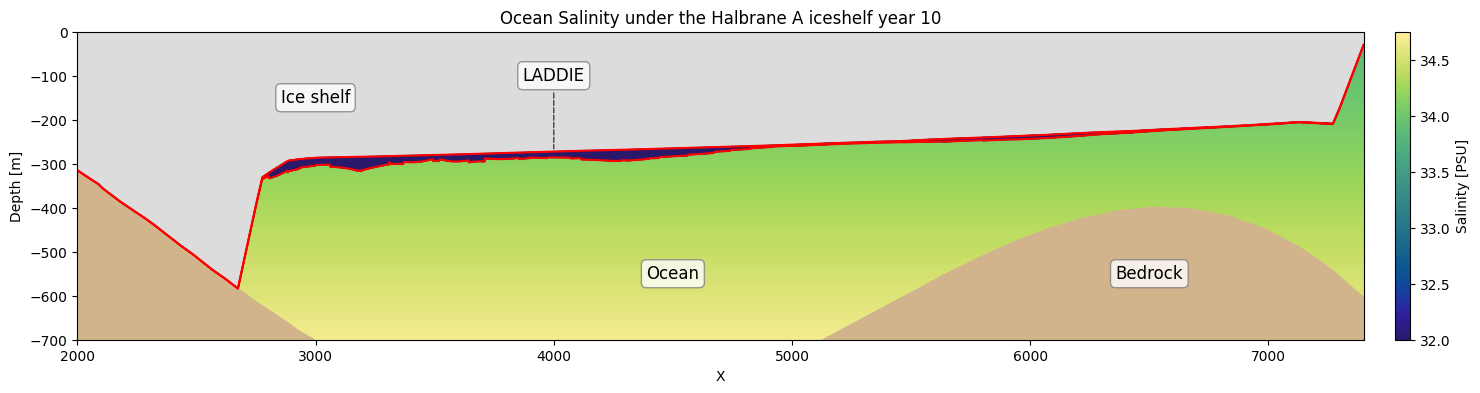

In [51]:
u = 10
vmin = 32
vmax = 34.75
cmap = cmo.haline
norm = plt.Normalize(vmin=vmin, vmax=vmax)

n = len(x) - 1

xi = np.column_stack([
    x[:-1],    # x[i]
    x[1:],     # x[i+1]
    x[1:],     # x[i+1]
    x[:-1]     # x[i]
])

H_lad_ = H_lad[u].values
S_lad_ = S_lad[u].values
T_lad_ = T_lad[u].values

H_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[0] for i in range(num)]
S_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[1] for i in range(num)]

yi = np.column_stack([
    Hib[u, :-1],                        # Hib_t[u][i]
    Hib[u, 1:],                         # Hib_t[u][i+1]
    Hib[u, 1:] - H_trans[1:],           # Hib_t[u][i+1] - H_trans[i+1]
    Hib[u, :-1] - H_trans[:-1]          # Hib_t[u][i] - H_trans[i]
])

fig, ax = plt.subplots(figsize=(20, 4))

contour_ocean = ax.contourf(X, -Y, average_So, cmap=cmap, levels=100, vmin = vmin, vmax = vmax)                                               # Ocean gradient  
ax.plot(Hib[u], color='red')                                                                                                                # Base of Ice shelf
ax.plot(Hib[u] - H_trans ,color ='red')                                                                                                     # Base of LADDIE
ax.fill_between(x, np.zeros(len(Hib[u])), Hib[u], color='gainsboro', alpha=1)  
ax.fill_between(x, -700*np.ones(len(Hib[0])), Hb[u].where(makeearth), color='tan', alpha=1)                                                         # Ice shelf in white

polygons = [plt.Polygon(np.column_stack([xi[i], yi[i]]), closed=True, color=colors[i], alpha=0.6) for i in range(n)]                          # LADDIE gradient

for poly in polygons:
    ax.add_patch(poly)


# Legends, Colorbar and Titles 

ax.text( x=3000, y=-150, s="Ice shelf",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=4500, y=-550, s="Ocean",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=6500, y=-550, s="Bedrock",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))

laddie_x = 4000  
idx = np.abs(x - laddie_x).argmin()
laddie_y_bottom = Hib[u][idx] 
ax.annotate(
    "LADDIE",
    xy=(laddie_x, laddie_y_bottom),  # End of the line (on boundary)
    xytext=(laddie_x, -100),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)                                                                                            
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Salinity [PSU]', pad=0.02)

ax.set_xlim(2000,7400)
ax.set_xlabel('X')                                                                                                                  
ax.set_ylabel('Depth [m]')
ax.set_title(f'Ocean Salinity under the Halbrane A iceshelf year {u}')                                                                   

plt.show()


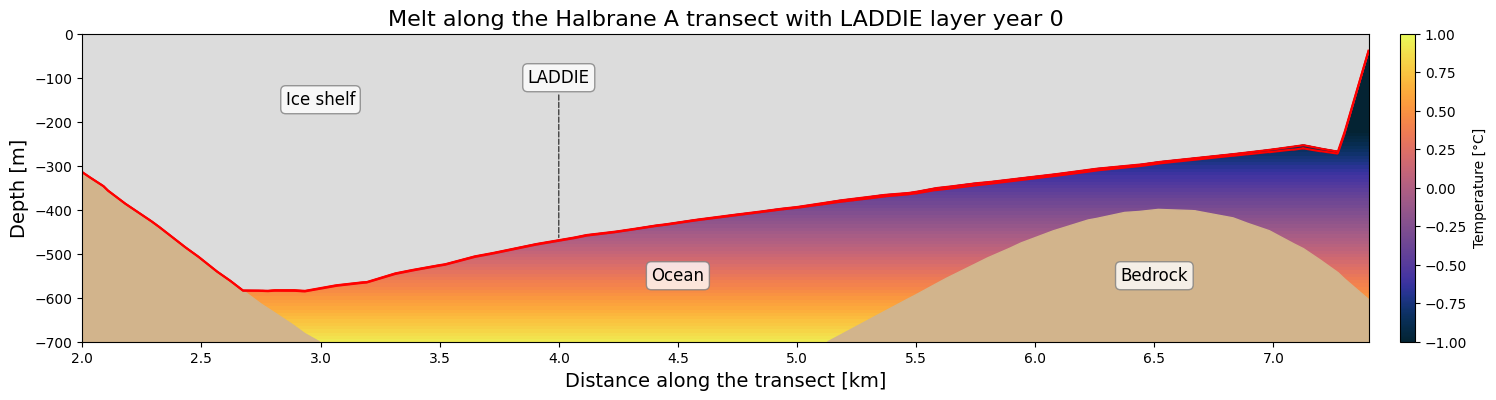

In [59]:
u = 0
vmin = -1
vmax = 1
cmap = cmo.thermal
norm = plt.Normalize(vmin=vmin, vmax=vmax)

n = len(x) - 1

xi = np.column_stack([
    x[:-1],    # x[i]
    x[1:],     # x[i+1]
    x[1:],     # x[i+1]
    x[:-1]     # x[i]
])

H_lad_ = H_lad[u].values
S_lad_ = S_lad[u].values
T_lad_ = T_lad[u].values

H_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[0] for i in range(num)]
T_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[2] for i in range(num)]


yi = np.column_stack([
    Hib[u, :-1],                        # Hib_t[u][i]
    Hib[u, 1:],                         # Hib_t[u][i+1]
    Hib[u, 1:] - H_trans[1:],           # Hib_t[u][i+1] - H_trans[i+1]
    Hib[u, :-1] - H_trans[:-1]          # Hib_t[u][i] - H_trans[i]
])

colors = cmap(norm(T_trans[:-1]))

fig, ax = plt.subplots(figsize=(20, 4))

contour_ocean = ax.contourf(X, -Y, average_To, cmap=cmap, levels=100, vmin = vmin, vmax = vmax)                                               # Ocean gradient  
ax.plot(Hib[u], color='red')                                                                                                                # Base of Ice shelf
ax.plot(Hib[u] - H_trans ,color ='red')                                                                                                     # Base of LADDIE
ax.fill_between(x, np.zeros(len(Hib[u])), Hib[u], color='gainsboro', alpha=1)  
ax.fill_between(x, -700*np.ones(len(Hib[0])), Hb[u].where(makeearth), color='tan', alpha=1)                                                         # Ice shelf in white                                                            # Ground in brown      
polygons = [plt.Polygon(np.column_stack([xi[i], yi[i]]), closed=True, color=colors[i], alpha=0.6) for i in range(n)]                          # LADDIE gradient

for poly in polygons:
    ax.add_patch(poly)


# Legends, Colorbar and Titles 

ax.text( x=3000, y=-150, s="Ice shelf",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=4500, y=-550, s="Ocean",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=6500, y=-550, s="Bedrock",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
laddie_x = 4000  
idx = np.abs(x - laddie_x).argmin()
laddie_y_bottom = Hib[u][idx] 
ax.annotate(
    "LADDIE",
    xy=(laddie_x, laddie_y_bottom),  # End of the line (on boundary)
    xytext=(laddie_x, -100),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)                                                                                            
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Temperature [°C]',pad = 0.02)

ax.set_xlim(2000, 7400)
ax.set_xticks(np.arange(2000, 7401, 500))
ax.set_xticklabels(np.arange(2000, 7401, 500) / 1000)

ax.set_xlabel('Distance along the transect [km]',fontsize=14)                                                                                                              
ax.set_ylabel('Depth [m]',fontsize = 14)
ax.set_title(f'Melt along the Halbrane A transect with LADDIE layer year {u}',fontsize = 16 )                                                                   

plt.show()


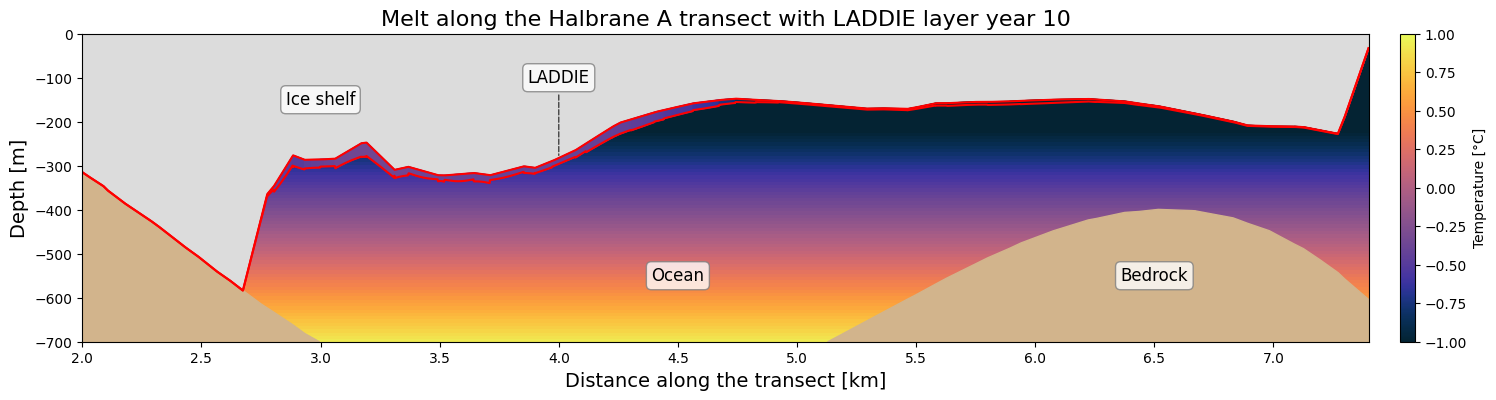

In [60]:
u = 10
vmin = -1
vmax = 1
cmap = cmo.thermal
norm = plt.Normalize(vmin=vmin, vmax=vmax)

n = len(x) - 1

xi = np.column_stack([
    x[:-1],    # x[i]
    x[1:],     # x[i+1]
    x[1:],     # x[i+1]
    x[:-1]     # x[i]
])

H_lad_ = H_lad[u].values
S_lad_ = S_lad[u].values
T_lad_ = T_lad[u].values

H_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[0] for i in range(num)]
T_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[2] for i in range(num)]


yi = np.column_stack([
    Hib[u, :-1],                        # Hib_t[u][i]
    Hib[u, 1:],                         # Hib_t[u][i+1]
    Hib[u, 1:] - H_trans[1:],           # Hib_t[u][i+1] - H_trans[i+1]
    Hib[u, :-1] - H_trans[:-1]          # Hib_t[u][i] - H_trans[i]
])

colors = cmap(norm(T_trans[:-1]))

fig, ax = plt.subplots(figsize=(20, 4))

contour_ocean = ax.contourf(X, -Y, average_To, cmap=cmap, levels=100, vmin = vmin, vmax = vmax)                                               # Ocean gradient  
ax.plot(Hib[u], color='red')                                                                                                                # Base of Ice shelf
ax.plot(Hib[u] - H_trans ,color ='red')                                                                                                     # Base of LADDIE
ax.fill_between(x, np.zeros(len(Hib[u])), Hib[u], color='gainsboro', alpha=1)  
ax.fill_between(x, -700*np.ones(len(Hib[0])), Hb[u].where(makeearth), color='tan', alpha=1)                                                         # Ice shelf in white                                                            # Ground in brown      
polygons = [plt.Polygon(np.column_stack([xi[i], yi[i]]), closed=True, color=colors[i], alpha=0.6) for i in range(n)]                          # LADDIE gradient

for poly in polygons:
    ax.add_patch(poly)


# Legends, Colorbar and Titles 

ax.text( x=3000, y=-150, s="Ice shelf",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=4500, y=-550, s="Ocean",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=6500, y=-550, s="Bedrock",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
laddie_x = 4000  
idx = np.abs(x - laddie_x).argmin()
laddie_y_bottom = Hib[u][idx] 
ax.annotate(
    "LADDIE",
    xy=(laddie_x, laddie_y_bottom),  # End of the line (on boundary)
    xytext=(laddie_x, -100),  # Text position
    ha='center', va='center',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)                                                                                            
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Temperature [°C]',pad = 0.02)

ax.set_xlim(2000, 7400)
ax.set_xticks(np.arange(2000, 7401, 500))
ax.set_xticklabels(np.arange(2000, 7401, 500) / 1000)

ax.set_xlabel('Distance along the transect [km]',fontsize=14)                                                                                                              
ax.set_ylabel('Depth [m]',fontsize = 14)
ax.set_title(f'Melt along the Halbrane A transect with LADDIE layer year {u}',fontsize = 16 )                                                                   

plt.show()



/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_47265/1520351985.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(-700, 1, 100), fontsize=tifs)


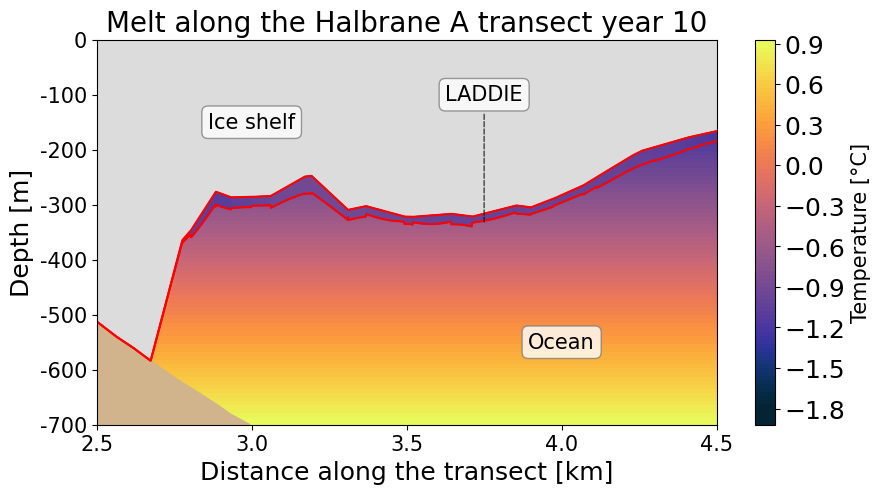

In [63]:
u = 10
vmin = -1
vmax = 1
cmap = cmo.thermal
norm = plt.Normalize(vmin=vmin, vmax=vmax)

n = len(x) - 1

xi = np.column_stack([
    x[:-1],    # x[i]
    x[1:],     # x[i+1]
    x[1:],     # x[i+1]
    x[:-1]     # x[i]
])

H_lad_ = H_lad[u].values
S_lad_ = S_lad[u].values
T_lad_ = T_lad[u].values

H_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[0] for i in range(num)]
T_trans = [HST(i,H_lad_,S_lad_,T_lad_,x3,y3)[2] for i in range(num)]


yi = np.column_stack([
    Hib[u, :-1],                        # Hib_t[u][i]
    Hib[u, 1:],                         # Hib_t[u][i+1]
    Hib[u, 1:] - H_trans[1:],           # Hib_t[u][i+1] - H_trans[i+1]
    Hib[u, :-1] - H_trans[:-1]          # Hib_t[u][i] - H_trans[i]
])

colors = cmap(norm(T_trans[:-1]))

fig, ax = plt.subplots(figsize=(10, 5))

contour_ocean = ax.contourf(X, -Y, average_To, cmap=cmap, levels=100, vmin = -1.8, vmax = 0.9)                                               # Ocean gradient  
ax.plot(Hib[u], color='red')                                                                                                                # Base of Ice shelf
ax.plot(Hib[u] - H_trans ,color ='red')                                                                                                     # Base of LADDIE
ax.fill_between(x, np.zeros(len(Hib[u])), Hib[u], color='gainsboro', alpha=1)  
ax.fill_between(x, -700*np.ones(len(Hib[0])), Hb[u].where(makeearth), color='tan', alpha=1)                                                         # Ice shelf in white                                                            # Ground in brown      
polygons = [plt.Polygon(np.column_stack([xi[i], yi[i]]), closed=True, color=colors[i], alpha=0.6) for i in range(n)]                          # LADDIE gradient

for poly in polygons:
    ax.add_patch(poly)


# Legends, Colorbar and Titles 

ax.text( x=3000, y=-150, s="Ice shelf",fontsize=tifs,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
ax.text( x=4000, y=-550, s="Ocean",fontsize=tifs,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
#ax.text( x=2000, y=-550, s="Bedrock",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
laddie_x = 3750  
idx = np.abs(x - laddie_x).argmin()
laddie_y_bottom = Hib[u][idx] -20
ax.annotate(
    "LADDIE",
    xy=(laddie_x, laddie_y_bottom),  # End of the line (on boundary)
    xytext=(laddie_x, -100),  # Text position
    ha='center', va='center',
    fontsize=tifs,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
    arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)                                                                                            
sm.set_array([])
cbar = fig.colorbar(contour, ax=ax, label='Temperature [°C]', shrink=1, pad=0.05, aspect=20)
cbar.ax.tick_params(labelsize=cbfs)
cbar.set_label('Temperature [°C]', fontsize=ctfs)

ax.set_xlim(2500, 4500)
ax.set_xticks(np.arange(2500, 4501, 500))
ax.set_xticklabels(np.arange(2500, 4501, 500) / 1000, fontsize = tifs)
ax.set_yticklabels(np.arange(-700, 1, 100), fontsize=tifs)
ax.set_xlabel('Distance along the transect [km]',fontsize=afs)                                                                                                              
ax.set_ylabel('Depth [m]',fontsize = afs)
ax.set_title(f'Melt along the Halbrane A transect year {u}',fontsize = tfs )                                                                   

plt.show()



In [62]:
def Tocean(d):
    a =(To[-1,1].values - To[0,1].values)/ 1500
    b = To[0,1].values
    return a * d + b
Tocean(700)

np.float64(0.9194444444444452)

In [37]:
T  = (Tocean(-Hib[u]) + Tocean(-(Hib[u]-H_trans)))/2

In [ ]:
T_t = np.array(T_trans)


(7400,)

(2740.0, 6700.0)

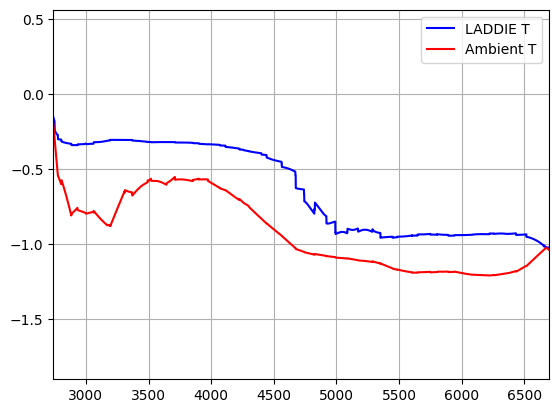

In [72]:
plt.plot(x,T_t, color = 'blue', label = 'LADDIE T')
plt.plot(x, T, color='red', label='Ambient T')
plt.legend()
plt.grid()
plt.xlim(2740, 6700)